# Visualizando a Poesia de Belchior

Projeto final da disciplina Visualização Científica, ministrada pela professora Emanuele Santos. 

**Lucas Cabral** <br>
Universidade Federal do Ceará, Mestrado e Doutorado em Ciências da Computação<br>
2019.2

![Belchior](https://www.urbanarts.com.br/imagens/produtos/123739/0/Ampliada/amar-e-mudar-as-coisas.jpg)
*Arte: [Daniel Brandão](https://www.estudiodanielbrandao.com/)*

Antonio Carlos Belchior, mais conhecido como Belchior (Sobral, 26 de outubro de 1946 – Santa Cruz do Sul, 30 de abril de 2017), foi um compositor cearense entre os mais notórios do cancioneiro popular brasileiro.  Dono de uma obra de grande densidade e complexidade estética, literária e filosófica, suas ricas composições são objeto de estudo acadêmico e um marco da cultura cearense. Este trabalho propõe uma análise de suas composições através de técnicas de processamento de linguagem natural e de visualização de dados. Dado a riqueza poético e musica das composições de Belchior, este trabalho não tem a pretenção de realizar uma análise literária ou linguística aprofundada, mas sim, movido por curiosidade e admiração, utilizar ferramentas computacionacias para explorar os padrões sintáticos e estatísticos que permeiam o conjunto de sua obra. Nos interessa saber:

- Qual a distribuição do tamanho das letras das músicas?
- Quais os termos mais relevantes na obra toda? E por música?
- Quais letras possuem maior similaridade? 
- Qual a polaridade de sentimento e o nível de subjetividade dominante na obra? E por música? 
- Quais são as palavras que mais ocorrem juntas? 

Vamos ver o que conseguimos descobrir!  

# Sobre os dados
As letras foram extraídas do site [Letras](https://www.letras.mus.br/) através de um [web-crawler](https://github.com/cabrau/datavis-course/blob/master/projeto_final/scrapping_lyrics.ipynb). Dando como input o nome do artista, o web-crawler percorre a lista de todas as músicas do artista, armazenando em uma tabela o título da música, se é uma das mais tocadas e a letra, descartando músicas cuja composição não seja do artista escolhido.

Após essa coleta, os dados passaram por uma etapa de [extração de features](https://github.com/cabrau/datavis-course/blob/master/projeto_final/pre_processing_text.ipynb) utilizando técnicas de processamento de linguagem natural, incluindo:

* Contagem de palavras por documento
* Tokenização
* Remoção de stopwords
* Normalização
* Extração de palavras-chave
* Distribuição de frequências de tokens
* Extração de nGramas
* Cálculo de matriz termo-documento (TF-IDF)
* Matriz de similaridade de documentos
* Redução de dimensionalidade com UMAP
* Análise de sentimentos
* Modelagem de tópicos

In [17]:
import pandas as pd
df = pd.read_csv('belchior.csv')
df.head(10)

,titulo,maisTocada,letra,tamanho,polaridade,subjetividade,sentimento,keywords,x,y
0,A Palo Seco,1,Se você vier me perguntar por onde andei No te...,195,-0.054545,0.463636,Neutro,"quero, canto, torto,",1.026348,-0.404600
1,Aguapé,0,Capineiro de meu pai Não me cortes meus cabelo...,257,0.032345,0.354072,Neutro,"nada, sentada, estrada,",3.453565,0.816508
2,Alucinação,1,Eu não estou interessado Em nenhuma teoria Em ...,370,0.194898,0.600680,Neutro,"coisas, nenhuma, amar,",1.937076,1.448731
3,Amor de Perdição,0,"Entrar, ficar em ti Tem sido o meu melhor peri...",213,0.156212,0.514444,Neutro,"amor, paz, deixa,",-0.068851,1.631042
4,Amor e Crime,0,"Amor, não há amor Existem só provas de amor Ma...",122,0.156944,0.661905,Neutro,"amor, tudo, provas,",0.350899,1.725880
5,Apenas Um Rapaz Latino Americano,1,Eu sou apenas um rapaz latino-americano Sem di...,358,0.142548,0.572816,Neutro,"tudo, nada, apenas,",2.771349,0.753159
6,Arte Final,0,"Desculpe qualquer coisa, passe outro dia, Agor...",317,0.128040,0.418286,Neutro,"dancei, ora, vem,",2.385046,0.422384
7,Até Amanhã,0,Até amanhã Se o homem quiser - mesmo se chover...,82,0.053247,0.242857,Neutro,"amanhã, homem, quiser,",1.929590,-0.851239
8,Ate Mais Ver,0,"Ate mais ver, ate mais ver, meu camarada. Cont...",73,0.123674,0.442803,Neutro,"ate, ver, nada,",3.545887,0.917342
9,Baihuno,0,Já que o tempo fez-te a graça de visitares o N...,324,-0.016784,0.520462,Neutro,"tão, mim, tempo,",-0.018045,-0.508043


# Contagem de palavras por músicas

In [18]:
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

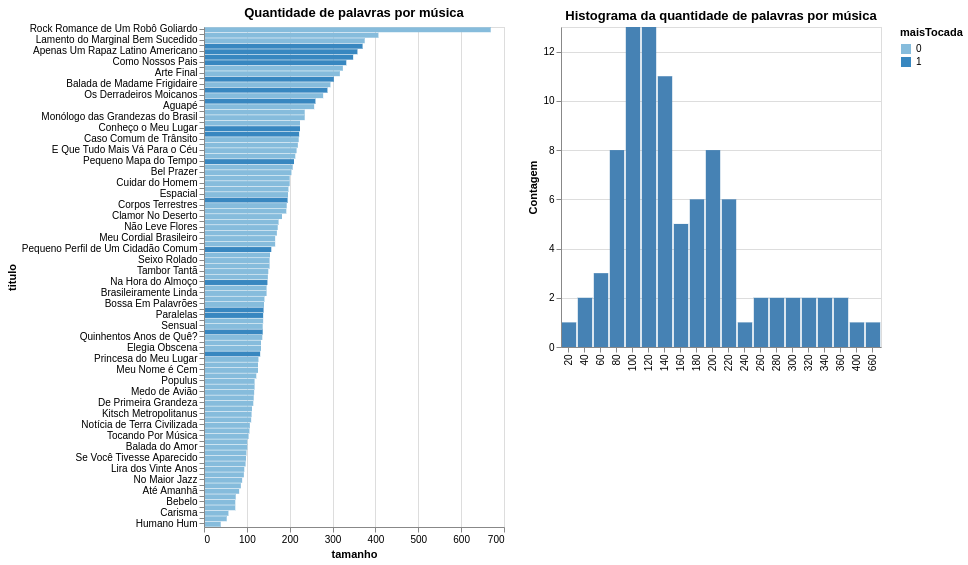

In [72]:
pts = alt.selection(type="interval", encodings=["x"])

rowbars = alt.Chart(df).mark_bar().encode(
    x='tamanho:Q',
    y= alt.Y('titulo:O', sort = alt.EncodingSortField(field="tamanho", order='descending')),   
    color = 'maisTocada:O',
    tooltip=['titulo', 'tamanho', 'keywords']
).transform_filter(
    pts
).properties(    
    height=500,
    width = 300,
    title = 'Quantidade de palavras por música'
)


hist = base.mark_bar().encode(
    x = alt.X('mbin:N',title=None),
    y = alt.Y('count()',title='Contagem'),
    color = alt.condition(pts, alt.value("steelblue"), alt.value("lightgray"))
).properties(
    height = 320,
    width = 320,
    title = 'Histograma da quantidade de palavras por música'
).add_selection(pts)

alt.hconcat(
    rowbars,
    hist,
    data=df
).transform_bin(
    "mbin",
    field="tamanho",
    bin=alt.Bin(maxbins=50)
)





# Termos mais frequentes